In [1]:
#Collating and Importing all the libraries used in this notebook
import numpy as np
import pandas as pd
from pandas import DataFrame

import seaborn as sns
from itertools import cycle
import scipy.stats as stats
import pylab 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta

from sklearn.preprocessing import StandardScaler

In [2]:
#Read the available datasets 

#Read the sell prices data for products over time and stores
Item_SellPrices = pd.read_csv('sell_prices.csv',delimiter=None)

#Read the calendar information available
Calendar = pd.read_csv('calendar.csv',delimiter=None)

#Read the sales data for last 5 years
Item_Sales = pd.read_csv('sales_train.csv',delimiter=None)

In [3]:
#Brief look at the Calendar dataset
Calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
#Understand the datatypes
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [5]:
#Understand the basic statistical metrics
Calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [6]:
#Brief look at the Sales dataset
Item_Sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:
#Understand the datatypes
Item_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [8]:
#Understand the basic statistical metrics
Item_Sales.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.370581,1.586159,1.693670,1.248245,1.232207,1.159167,1.149000,1.328862,1.605838,1.633158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.740017,4.097191,4.359809,3.276925,3.125471,2.876026,2.950364,3.358012,4.089422,3.812248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,129.000000,160.000000,204.000000,98.000000,100.000000,88.000000,77.000000,141.000000,171.000000,130.000000


In [9]:
#Brief look at the Pricing dataset
Item_SellPrices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [10]:
#Understand the datatypes
Item_SellPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [11]:
#Understand the basic statistical metrics

Item_SellPrices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [12]:
# Check the unique stores for which data is available from Sales and Prices datasets.
print(Item_SellPrices['store_id'].unique())
print(Item_Sales['store_id'].unique())

['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [13]:
#create list of days based on if 'd_' is present in the column names
days_list = [day for day in Item_Sales.columns if 'd_' in day] #create a column for days

# Transform the overall sales data for plotting trend lines i.e. bringing dates from columns to rows  
Overall_Sales_All = Item_Sales.set_index('id')[days_list] \
    .T \
    .merge(Calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

Overall_Sales_All

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,...,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,1,1,1,0,1,0,1,4,0,0,...,4,1,1,0,0,0,0,1,1,0
2016-04-21,3,0,0,1,2,0,0,6,0,0,...,2,3,3,0,2,1,0,0,0,0
2016-04-22,0,0,1,3,2,2,0,3,0,2,...,0,1,6,0,3,0,0,0,3,0


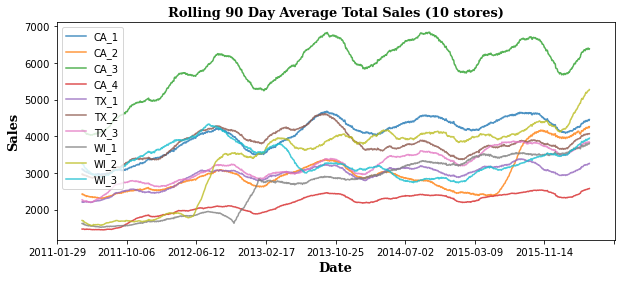

In [14]:
#PLotting the sales trend line for all 10 stores across 3 stores.
#defining the font styling details
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }

store_list = Item_Sales['store_id'].unique()
for s in store_list:
    store_items = [c for c in Overall_Sales_All.columns if s in c]
    Overall_Sales_All[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(10, 4),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')

    plt.legend(store_list)

#setting the axes label and title name
plt.title('Rolling 90 Day Average Total Sales (10 stores)',fontdict=font)
plt.xlabel('Date',fontdict=font)
plt.ylabel('Sales',fontdict=font)

plt.show()


In [15]:
# Selecting Texas Stores alone for deep diving into the EDA
SelectStores = ['TX_1','TX_2','TX_3']

#Filter the Sales and Prices datasets for TX 
Item_SellPrices_TX = Item_SellPrices.loc[Item_SellPrices['store_id'].isin(SelectStores)]
Item_Sales_TX = Item_Sales.loc[Item_Sales['store_id'].isin(SelectStores)]
Item_SellPrices_TX = Item_SellPrices_TX.reset_index(drop=True)
Item_Sales_TX = Item_Sales_TX.reset_index(drop=True)


In [16]:
#Checking total unique items in Sale
len(Item_Sales_TX['id'].unique())


9147

In [17]:
#Understand the basic statistical metrics for TX
Item_Sales_TX.describe()


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
count,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,...,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000,9147.000000
mean,1.031814,1.052804,0.741008,0.806931,0.646332,0.984585,0.680660,1.032032,1.025036,0.800153,...,1.180715,1.362195,1.498743,1.078824,1.194053,1.049524,1.049743,1.160490,1.340986,1.342735
std,5.169040,5.167472,3.575089,3.657772,2.899718,4.460126,3.521329,5.263675,5.077028,3.461302,...,3.296525,3.726564,3.979374,3.201659,3.122517,2.741397,2.768184,3.207293,3.969233,3.546334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,203.000000,215.000000,128.000000,127.000000,92.000000,159.000000,150.000000,200.000000,184.000000,104.000000,...,84.000000,124.000000,102.000000,98.000000,81.000000,60.000000,59.000000,80.000000,102.000000,75.000000


In [18]:

matplotlib.style.use('seaborn')
%matplotlib inline
   

In [19]:
#Create a list of columns related to days by checking for 'd_' in all column names of dataframe
days_list = [day for day in Item_Sales_TX.columns if 'd_' in day] #create a column for days

#Subset the datset and get overall daywise sales for TX 
Daywise_Sales = pd.DataFrame(Item_Sales_TX[days_list].sum(axis =0))
Daywise_Sales.columns = ['Sales']
Daywise_Sales

,Sales
d_1,9438
d_2,9630
d_3,6778
d_4,7381
d_5,5912
...,...
d_1909,9600
d_1910,9602
d_1911,10615
d_1912,12266


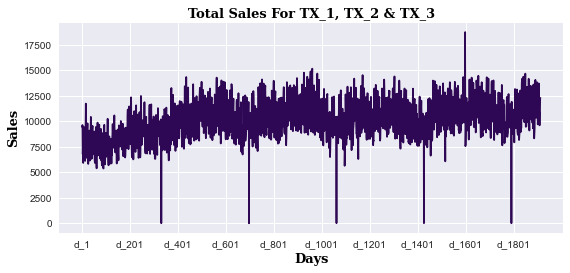

In [20]:
# This graph is to check the daily sales trend of all Texas stores combined. 

matplotlib.style.use('seaborn')
%matplotlib inline

#Defining the font styling attributes for consistency. Same will be used across all graphs.
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }

#Specify plot size
fig, ax = plt.subplots(figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, left=0.2)

#Use daywise sales dataframe created above
#Specify any color for trend lines
ax.plot(Daywise_Sales, color='#2E0854')
#Daywise_Sales.describe()

#Setting labels and title
ax.set_xlabel('Days', fontdict=font)
ax.set_ylabel('Sales', fontdict=font)
ax.set_title('Total Sales For TX_1, TX_2 & TX_3', fontdict=font)

plt.xticks(np.arange(0,2000,200))
plt.show()

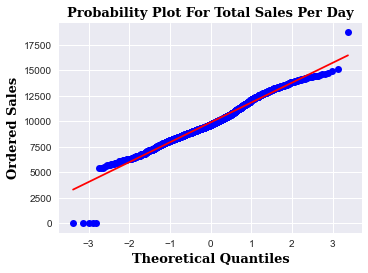

In [21]:
# This is a Q-Q plot check for any potential outliers  

matplotlib.style.use('seaborn')
%matplotlib inline

#Specify plot size
fig, ax = plt.subplots(figsize=(6, 4))
fig.subplots_adjust(bottom=0.15, left=0.2)
   
#Use daywise sales dataframe created above
#Specify any color for trend lines    
stats.probplot(Daywise_Sales['Sales'], dist="norm", plot=pylab)

#Setting axes label and title names
pylab.title("Probability Plot For Total Sales Per Day",fontdict=font)
pylab.xlabel('Theoretical Quantiles',fontdict=font)
pylab.ylabel('Ordered Sales',fontdict=font)

pylab.show()

C:\Users\Shlok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot For Total Sales Per Day'}, xlabel='Sales'>

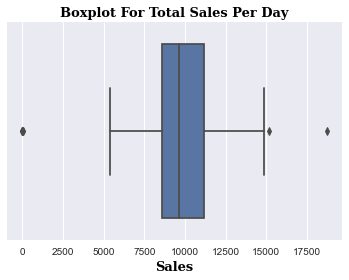

In [22]:
# This is a box plot check for any potential outliers  

fig, ax = plt.subplots(figsize=(6, 4))

#Using the daywise sales to identify zero/peak days
ax = sns.boxplot(Daywise_Sales['Sales'])

#Setting axes label and title names
ax.set_xlabel('Sales', fontdict=font)
ax.set_title('Boxplot For Total Sales Per Day', fontdict=font)
ax

In [23]:
#Creating quartiles
Q1 = Daywise_Sales['Sales'].quantile(0.25)
Q3 = Daywise_Sales['Sales'].quantile(0.75)

#Calculate inter quartile range
InterQuartileRange = Q3 - Q1

#Filter the daywise sales based on IterQuartileRange value
OutlierDays = pd.DataFrame(Daywise_Sales['Sales'][(Daywise_Sales['Sales'] < (Q1 - 1.5 * InterQuartileRange)) |(Daywise_Sales['Sales'] > (Q3 + 1.5 * InterQuartileRange))])
OutlierDays.reset_index(inplace=True)
OutlierDays.columns = ['d','Sales']

#outlier values
#Print outlier days and sales 
print((OutlierDays))
#print(type(Calendar))


#remove Outliers?

        d  Sales
0   d_331      2
1   d_697      2
2   d_961  15151
3  d_1062     13
4  d_1427     13
5  d_1599  18733
6  d_1792      4


In [24]:
#Merge with the Calendar to see any event information for these potential outlier days 
OutlierCalendarCheck = pd.merge(Calendar, OutlierDays, on=["d"])
OutlierCalendarCheck

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,Sales
0,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0,2
1,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0,2
2,2013-09-15,11334,Sunday,2,9,2013,d_961,NaN,NaN,NaN,NaN,0,1,1,15151
3,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0,13
4,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0,13
5,2015-06-15,11520,Monday,3,6,2015,d_1599,NaN,NaN,NaN,NaN,0,1,1,18733
6,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0,4


In [25]:
Item_Sales_TX.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1,HOBBIES_1_002_TX_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,HOBBIES_1_003_TX_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,1,2,1,0,...,0,3,2,0,1,0,0,0,2,2
4,HOBBIES_1_005_TX_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,1,2,2,0,0,2,3,0,5,2
5,HOBBIES_1_006_TX_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
6,HOBBIES_1_007_TX_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
7,HOBBIES_1_008_TX_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,TX_1,TX,4,7,2,0,...,1,0,0,1,1,4,0,3,1,1
8,HOBBIES_1_009_TX_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,TX_1,TX,3,1,0,2,...,0,0,0,0,1,0,0,1,1,1
9,HOBBIES_1_010_TX_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1


In [26]:
# Transform the TX sales data for plotting trend lines i.e. bringing dates from columns to rows  
Overall_Sales = Item_Sales_TX.set_index('id')[days_list] \
    .T \
    .merge(Calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

Overall_Sales

,HOBBIES_1_001_TX_1_validation,HOBBIES_1_002_TX_1_validation,HOBBIES_1_003_TX_1_validation,HOBBIES_1_004_TX_1_validation,HOBBIES_1_005_TX_1_validation,HOBBIES_1_006_TX_1_validation,HOBBIES_1_007_TX_1_validation,HOBBIES_1_008_TX_1_validation,HOBBIES_1_009_TX_1_validation,HOBBIES_1_010_TX_1_validation,...,FOODS_3_818_TX_3_validation,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,1,0,0,0,4,3,0,...,0,9,3,0,7,0,0,0,0,0
2011-01-30,0,0,0,2,0,0,0,7,1,0,...,0,0,2,0,5,0,1,0,0,0
2011-01-31,0,0,0,1,0,0,0,2,0,0,...,0,3,1,0,5,0,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,2,0,...,0,0,3,0,3,0,1,2,0,0
2011-02-02,0,0,0,2,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,0,0,0,0,2,0,0,4,0,0,...,3,0,1,0,0,0,0,0,3,0
2016-04-21,1,0,0,0,3,1,1,0,0,0,...,0,1,2,2,1,0,0,0,1,1
2016-04-22,0,0,0,0,0,0,0,3,1,1,...,1,0,3,2,0,2,0,4,2,0


In [27]:
#Checking the sales for those two peak days
Overall_Sales_OutlierCheck = Overall_Sales.loc[ ['2013-09-15','2015-06-15'] , : ]
Overall_Sales_OutlierCheck

,HOBBIES_1_001_TX_1_validation,HOBBIES_1_002_TX_1_validation,HOBBIES_1_003_TX_1_validation,HOBBIES_1_004_TX_1_validation,HOBBIES_1_005_TX_1_validation,HOBBIES_1_006_TX_1_validation,HOBBIES_1_007_TX_1_validation,HOBBIES_1_008_TX_1_validation,HOBBIES_1_009_TX_1_validation,HOBBIES_1_010_TX_1_validation,...,FOODS_3_818_TX_3_validation,FOODS_3_819_TX_3_validation,FOODS_3_820_TX_3_validation,FOODS_3_821_TX_3_validation,FOODS_3_822_TX_3_validation,FOODS_3_823_TX_3_validation,FOODS_3_824_TX_3_validation,FOODS_3_825_TX_3_validation,FOODS_3_826_TX_3_validation,FOODS_3_827_TX_3_validation
date,,,,,,,,,,,,,,,,,,,,,
2013-09-15,0,0,0,0,1,0,0,6,2,0,...,1,0,1,0,4,0,0,1,3,0
2015-06-15,0,0,0,1,0,0,0,5,3,0,...,0,2,1,1,4,0,0,0,2,0


In [28]:
#peak days
days_list_outliers = ['d_961','d_1599']

#Creating dataframes at different levels for plotting graphs - Store level, Category-Store level, Category-Store-Sept level etc..  
TX_Store = Item_Sales_TX.groupby(['store_id'])[days_list].apply(lambda x : x.astype(int).sum())
TX_CatStore = Item_Sales_TX.groupby(['cat_id','store_id'])[days_list].apply(lambda x : x.astype(int).sum())
TX_CatStoreDept = Item_Sales_TX.groupby(['cat_id','store_id','dept_id'])[days_list].apply(lambda x : x.astype(int).sum())
TX_CatStoreDeptItem = Item_Sales_TX.groupby(['cat_id','store_id','dept_id','item_id'])[days_list].apply(lambda x : x.astype(int).sum())

#Creating dataframes at Category-Store level for plotting graphs for outlier days 
TX_CatStore_Outlier = Item_Sales_TX.groupby(['cat_id','store_id'])[days_list_outliers].apply(lambda x : x.astype(int).sum())

TX_Store.reset_index(inplace=True)
TX_CatStore.reset_index(inplace=True)
TX_CatStoreDept.reset_index(inplace=True)
TX_CatStoreDeptItem.reset_index(inplace=True)

TX_CatStore_Outlier.reset_index(inplace=True)

#Creating dataframes at different levels for plotting graphs - Store level, Category-Store level, Category-Store-Sept level etc..  
TX_Store = TX_Store.melt(id_vars=['store_id'], 
        var_name="DayCode", 
        value_name="Sales")
TX_CatStore = TX_CatStore.melt(id_vars=['cat_id','store_id'], 
        var_name="DayCode", 
        value_name="Sales")
TX_CatStoreDept = TX_CatStoreDept.melt(id_vars=['cat_id','store_id','dept_id'], 
        var_name="DayCode", 
        value_name="Sales")
TX_CatStoreDeptItem = TX_CatStoreDeptItem.melt(id_vars=['cat_id','store_id','dept_id','item_id'], 
        var_name="DayCode", 
        value_name="Sales")

#Creating dataframes at Category-Store level for plotting graphs for outlier days 
TX_CatStore_Outlier = TX_CatStore_Outlier.melt(id_vars=['cat_id','store_id'], 
        var_name="DayCode", 
        value_name="Sales")


Text(0.5, 1.0, 'Average Store sales for each Day')

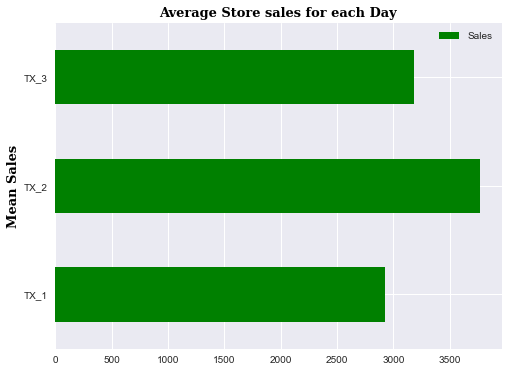

In [29]:
#Plot a graph to understand average daily sales for each store  
#Reading the Store level sales dataset created above 
TX_Stores = TX_Store.groupby(['store_id'])
aa = TX_Stores.mean().plot(kind='barh',ylabel = "Mean Sales",title="Average Store sales for each Day",figsize=(8,6),color = 'green')

#Setting axes label and title names
aa.set_ylabel("Mean Sales", fontdict=font)
aa.set_title("Average Store sales for each Day", fontdict=font)

Text(0.5, 1.0, 'Store Sales On Both Peak(outlier) Days')

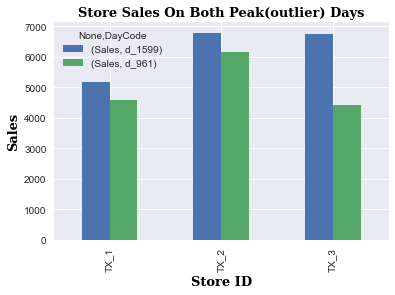

In [30]:
#Plot a graph to understand sales on both peak(outlier) days for each store  
 
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 13,
        }

#Reading the Category Store level Outlier sales dataset created above
TX_Store_Outliers = TX_CatStore_Outlier.groupby(['store_id','DayCode'])
aa = TX_Store_Outliers.sum().unstack().plot(kind='bar',ylabel = "Sales",title="Store sales on both Peak(outlier) Days",figsize=(6,4))

#Setting axes label and title names
aa.set_ylabel("Sales", fontdict=font)
aa.set_xlabel("Store ID", fontdict=font)
aa.set_title("Store Sales On Both Peak(outlier) Days", fontdict=font)



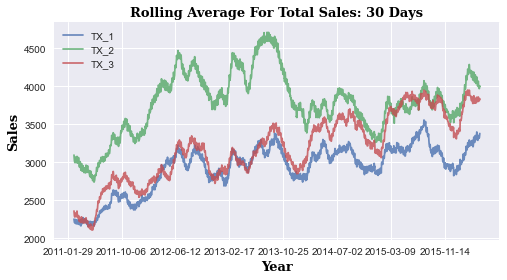

In [31]:
#Plot a graph to understand Rolling 30 days sales for each TX Store

#Create a list of all store ids in TX
st_id = Item_Sales_TX['store_id'].unique()
for store in st_id:
    st_products = list()
    for k in Overall_Sales.columns: 
        if store in k:
            st_products.append(k)

    Overall_Sales[st_products] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(8, 4),
              alpha=0.8)

#Setting axes label and title names

plt.title('Rolling Average For Total Sales: 30 Days',fontdict=font)
plt.xlabel('Year',fontdict=font)
plt.ylabel('Sales',fontdict=font)

plt.legend(st_id)
plt.show()

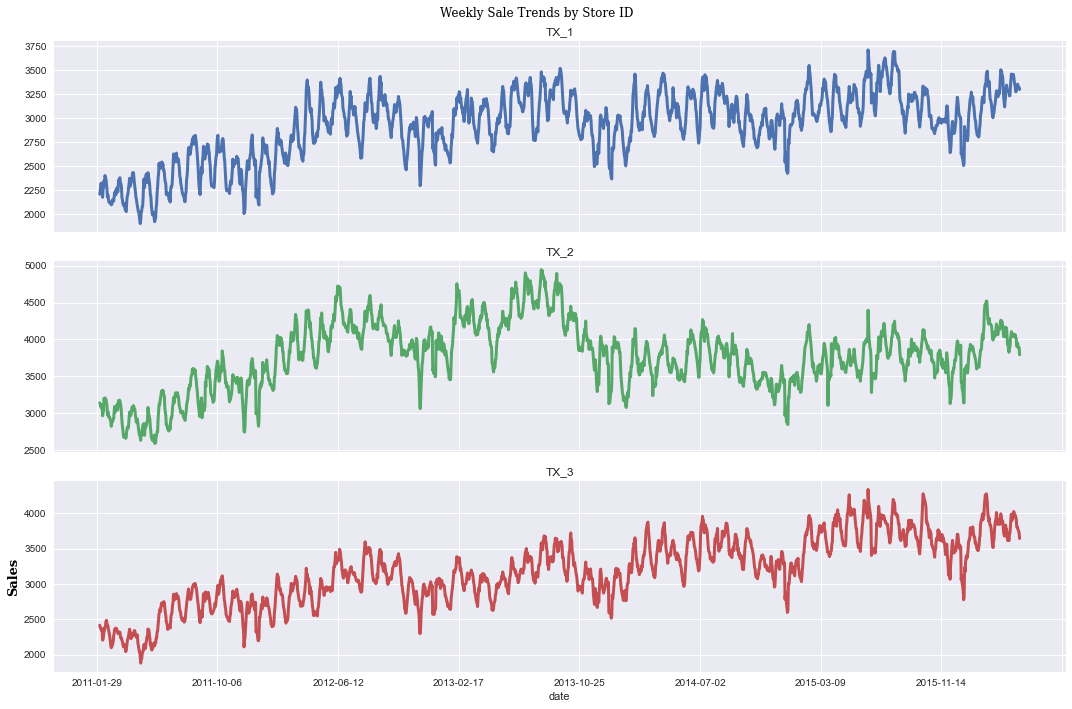

In [32]:
#Plot a graph to understand weekly sales (rolling 7 day) for each TX Store

#Creating color cycle to assign random 
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

#Create subplots for each store trend
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0

#unique store ids 
st_id = Item_Sales_TX['store_id'].unique()

for store in st_id:
    st_products = list()
    for k in Overall_Sales.columns: 
        if store in k:
            st_products.append(k)

#plotting the graph
    Overall_Sales[st_products] \
        .sum(axis=1) \
        .rolling(7).mean() \
        .plot(alpha=1,
              ax=axes[ax_idx],
              title=store,
              lw=3,
              color=next(color_cycle))
    ax_idx += 1 #change the axis location
    
#Setting axes label and title names
plt.ylabel('Sales',fontdict=font)    
plt.suptitle('Weekly Sale Trends by Store ID',fontdict=font)
plt.tight_layout()
plt.show()

cat_id
FOODS        4311
HOBBIES      1695
HOUSEHOLD    3141
Name: TX, dtype: int64


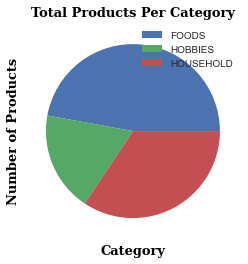

In [33]:
#Plot a pie chart to understand the total product available for each category
ytick_values = [y for y in range(0,4800,400)]

#Reading the overall texas sales and group by category and state. State is only TX, so doesnt make much difference here
CategoryCount = Item_Sales_TX.groupby(['cat_id', 'state_id']).size().unstack()
print(CategoryCount['TX'])

#PLotting Pie chart
plt.pie(CategoryCount['TX'])

#Setting axes label and title names

plt.xlabel('Category',fontdict=font)
plt.ylabel('Number of Products', fontdict=font)
plt.title('Total Products Per Category',fontdict=font)
plt.legend(CategoryCount['TX'].index)


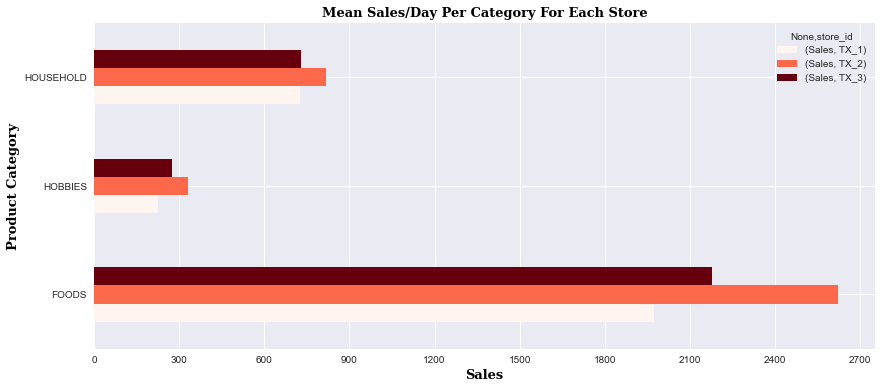

In [34]:
#Plot a bar chart to find out mean daily sales per category per store 

xtick_values = [x for x in range(0,3000,300)]

#Read the Store-Category level datset created above 
Category_Store_Mean_Day = TX_CatStore.groupby(['cat_id', 'store_id']).mean().unstack()
Category_Store_Mean_Day.plot(kind='barh',figsize=(14,6),xticks=xtick_values,colormap='Reds')

#Setting axes label and title names

plt.title('Mean Sales/Day Per Category For Each Store',fontdict=font)
plt.xlabel('Sales',fontdict=font)
plt.ylabel('Product Category',fontdict=font)

plt.show()

Text(0, 0.5, 'Sales')

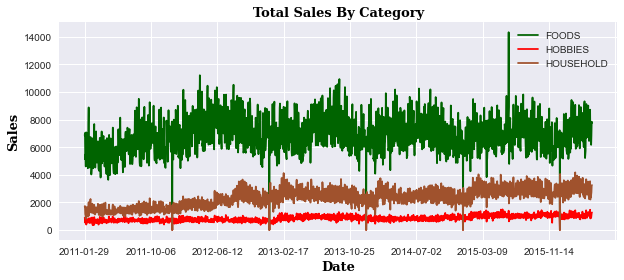

In [35]:
TX_CatStore_temp = TX_CatStore.rename({'DayCode': 'd'}, axis=1)
TX_CatStore_temp = pd.merge(TX_CatStore_temp,Calendar[['d','date']],on='d', how='left')

#reading the datsets created above for store category level sales
TX_FoodDept = TX_CatStore_temp 
FoodDept_Sales = TX_FoodDept.groupby(['date', 'cat_id']).sum().unstack()
ax=FoodDept_Sales.plot(kind='line',ylabel = "Sales",title="Food departmemt wise sales",figsize=(10,4))
st_id = TX_FoodDept['cat_id'].unique()

#Plot a graph to understand total sales by category
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("darkgreen")
    ax.get_lines()[1].set_color("red")
    ax.get_lines()[2].set_color("sienna")
    
#Setting axes label and title names
    
plt.legend(st_id)
plt.title('Total Sales By Category',fontdict=font)
plt.xlabel('Date',fontdict=font)
plt.ylabel('Sales',fontdict=font)

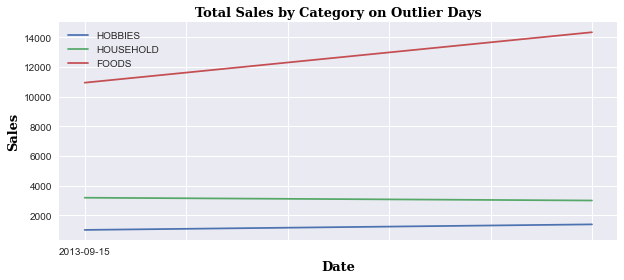

In [36]:
#colors=['m','y','c']
#list of categories
st_id = Item_Sales_TX['cat_id'].unique()

for store in st_id:
    st_products = list()
    for k in Overall_Sales_OutlierCheck.columns: 
        if store in k:
            st_products.append(k)
        #print(st_products)
        
#Plot a graph to understand total sales by category on outlier days
    Overall_Sales_OutlierCheck[st_products] \
        .sum(axis=1) \
        .plot(figsize=(10, 4))

#Setting axes label and title names

plt.title('Total Sales by Category on Outlier Days',fontdict=font)
plt.xlabel('Date',fontdict=font)
plt.ylabel('Sales',fontdict=font)
plt.legend(st_id)

#need to fix x-axis

Text(0, 0.5, 'Sales')

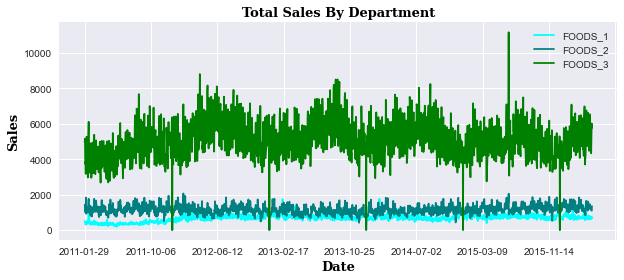

In [37]:

TX_CatStoreDept_temp = TX_CatStoreDept.rename({'DayCode': 'd'}, axis=1)
TX_CatStoreDept_temp = pd.merge(TX_CatStoreDept_temp,Calendar[['d','date']],on='d', how='left')

#reading the datsets created above for store-category-dept level sales
TX_FoodDept = TX_CatStoreDept_temp[(TX_CatStoreDept_temp['cat_id'] == 'FOODS')] 
FoodDept_Sales = TX_FoodDept.groupby(['date', 'dept_id']).sum().unstack()
ax=FoodDept_Sales.plot(kind='line',ylabel = "Sales",title="Food departmemt wise sales",figsize=(10,4))
dept_id = TX_FoodDept['dept_id'].unique()

#reading the datsets created above for store category level sales
for ax in plt.gcf().axes:
    ax.get_lines()[0].set_color("aqua")
    ax.get_lines()[1].set_color("teal")
    ax.get_lines()[2].set_color("green")

#Setting axes label and title names
   
plt.legend(dept_id)
plt.title('Total Sales By Department',fontdict=font)
plt.xlabel('Date',fontdict=font)
plt.ylabel('Sales',fontdict=font)

<AxesSubplot:title={'center':'Food departmemt wise sales'}, xlabel='date', ylabel='Sales'>

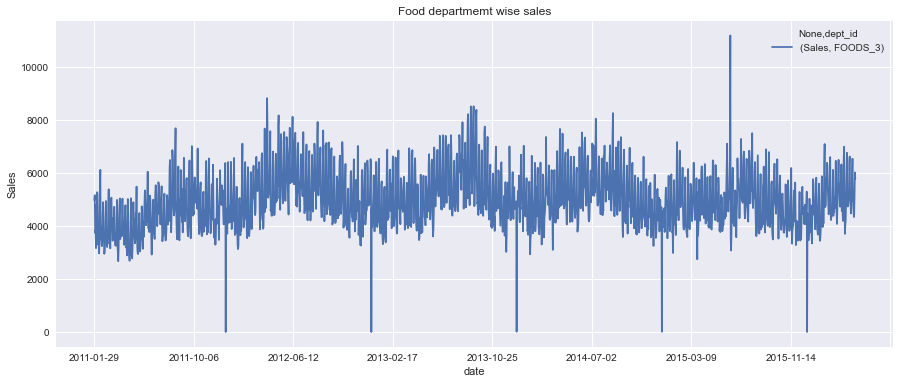

In [38]:
#reading the datsets created above for department level sales - FOODS_3

TX_CatStoreDeptItem_temp = TX_CatStoreDeptItem.rename({'DayCode': 'd'}, axis=1)

TX_CatStoreDeptItem = pd.merge(TX_CatStoreDeptItem_temp,Calendar[['d','date']],on='d', how='left')

#plot sales trend graph for FOOD_3
TX_FoodDept = TX_CatStoreDeptItem[(TX_CatStoreDeptItem['dept_id'] == 'FOODS_3')] 
FoodDept_Sales = TX_FoodDept.groupby(['date', 'dept_id']).sum().unstack()
FoodDept_Sales.plot(kind='line',ylabel = "Sales",title="Food departmemt wise sales",figsize=(15,6))



In [39]:
#Analyzing the reasons for peak day sales : 2015-06-15

DayCheck = TX_CatStoreDeptItem[(TX_CatStoreDeptItem['date'] == '2015-06-15') & (TX_CatStoreDeptItem['dept_id']=="FOODS_3")] 
DayCheck.reset_index(drop=True)

#Filtering the data only for deparmtent FOODS_3, as we observed the peak here only 
AllDayCheck = TX_CatStoreDeptItem[ (TX_CatStoreDeptItem['dept_id']=="FOODS_3")] 
AllDayCheck.reset_index(drop=True)

ItemLevelDayCheck = DayCheck.groupby('item_id', as_index=False).agg({"Sales": "sum"})

ItemLevelAllDayCheck = AllDayCheck.groupby(['item_id','date'], as_index=False).agg({"Sales": "sum"})

def std(x): 
    return np.std(x)

# Playing with the dataframe to get mean, max and StdDev metrics for each item within FOODS_3 department 
ItemLevelDayStats = ItemLevelAllDayCheck.groupby('item_id',as_index=False).agg(['mean', 'max', std]).reset_index(drop = False)
ItemLevelDayStats.columns =['item_id','mean','max','std']
ItemLevelDayStats['Mean_2StdDev'] = ItemLevelDayStats['mean'] + 2*ItemLevelDayStats['std']

#Merging the Created stat metrics 
ItemLevelDayCheck = pd.merge(ItemLevelDayCheck,ItemLevelDayStats[['item_id','mean','Mean_2StdDev','max']],on='item_id', how='left').sort_values('Sales', ascending=False)


In [40]:
#CReating a boost factor for each item within FOOD_3 dept with the help of stat metrics created above
ItemLevelDayCheckShort=ItemLevelDayCheck[(ItemLevelDayCheck['Sales']>ItemLevelDayCheck['Mean_2StdDev']) & (ItemLevelDayCheck['Sales']>20)]
print(ItemLevelDayCheck['Sales'].sum())
print(ItemLevelDayCheckShort['Sales'].sum())
ItemLevelDayCheckShort['BoostFactor'] = ((ItemLevelDayCheckShort['Sales']/ItemLevelDayCheckShort['Mean_2StdDev']) +(ItemLevelDayCheckShort['Sales']/ItemLevelDayCheckShort['mean']))/2
ItemLevelDayCheckShort=ItemLevelDayCheckShort.sort_values('BoostFactor', ascending=False)
ItemLevelDayCheckShort = ItemLevelDayCheckShort[ItemLevelDayCheckShort['BoostFactor']>6]
ItemLevelDayCheckShort


11175
5103


<ipython-input-40-72c1cc8b18cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ItemLevelDayCheckShort['BoostFactor'] = ((ItemLevelDayCheckShort['Sales']/ItemLevelDayCheckShort['Mean_2StdDev']) +(ItemLevelDayCheckShort['Sales']/ItemLevelDayCheckShort['mean']))/2


,item_id,Sales,mean,Mean_2StdDev,max,BoostFactor
110,FOODS_3_112,73,1.674856,6.985836,73,27.017773
755,FOODS_3_760,58,1.961317,10.780478,58,17.476028
170,FOODS_3_172,51,2.086775,9.796294,51,14.822840
33,FOODS_3_034,60,2.693152,10.206984,60,14.078527
179,FOODS_3_181,43,2.125980,6.756080,43,13.295301
47,FOODS_3_048,49,2.994773,10.173464,49,10.589148
417,FOODS_3_419,26,1.544171,7.914601,26,10.061288
70,FOODS_3_072,21,1.416100,6.053904,21,9.149147
75,FOODS_3_077,95,8.237324,33.838317,95,7.170170
659,FOODS_3_661,46,4.089911,16.135871,46,7.048990


Text(0.5, 1.0, 'Products That Boosted Sales')

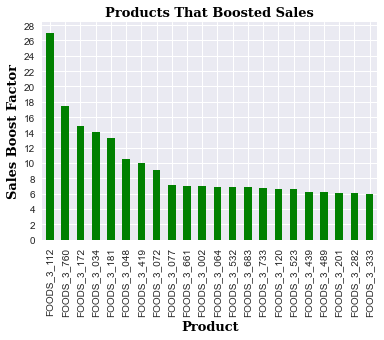

In [41]:
ytick_values = [y for y in range(0,30,2)]

#Plotting a bar graph for items with highest Boost factor within FOOD_3 dept. Equivalent to the contributing items for logical reasoning of peak sales, not to be considered as an exact multiplication X factor
CheckShort = ItemLevelDayCheckShort.groupby(['item_id'])['BoostFactor'].sum().sort_values(ascending=False)
CheckShort.plot(kind='bar',figsize=(6,4),yticks=ytick_values,color='green')

#setting the axes labels and titles
plt.xlabel("Product",fontdict=font)
plt.ylabel("Sales Boost Factor",fontdict=font)
plt.title("Products That Boosted Sales",fontdict=font)

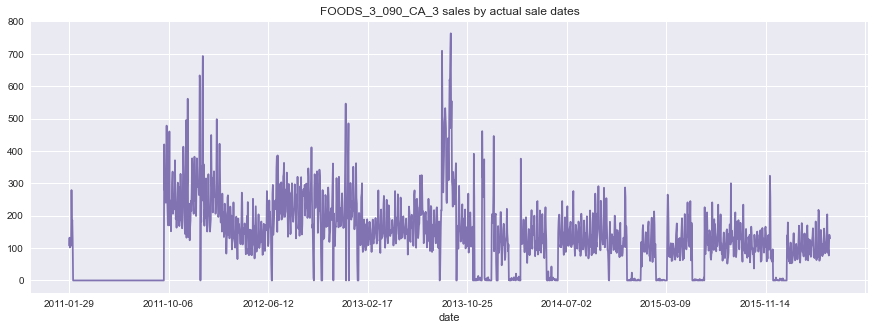

In [42]:
#Checking the availability of some random items in inventory, as they out of stock or off shelf at times

example = Item_Sales.loc[Item_Sales['id'] == 'FOODS_3_090_CA_3_validation'][days_list].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(Calendar, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

# Select more top selling examples
example2 = Item_Sales.loc[Item_Sales['id'] == 'HOBBIES_1_234_CA_3_validation'][days_list].T
example2 = example2.rename(columns={6324:'HOBBIES_1_234_CA_3'}) # Name it correctly
example2 = example2.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example2 = example2.merge(Calendar, how='left', validate='1:1')

example3 = Item_Sales.loc[Item_Sales['id'] == 'HOUSEHOLD_1_118_CA_3_validation'][days_list].T
example3 = example3.rename(columns={6776:'HOUSEHOLD_1_118_CA_3'}) # Name it correctly
example3 = example3.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example3 = example3.merge(Calendar, how='left', validate='1:1')

In [43]:
#Calendar.groupby(['event_name_1','event_type_1','event_name_2','event_type_2']).size()
#Understanding the event type 1 and names within that
Calendar.groupby(['event_name_1','event_type_1']).size().reset_index().rename(columns={0:'count'})

,event_name_1,event_type_1,count
0,Chanukah End,Religious,5
1,Christmas,National,5
2,Cinco De Mayo,Cultural,5
3,ColumbusDay,National,5
4,Easter,Cultural,5
5,Eid al-Fitr,Religious,5
6,EidAlAdha,Religious,5
7,Father's day,Cultural,4
8,Halloween,Cultural,5
9,IndependenceDay,National,5


55 	 Religious
52 	 National
37 	 Cultural
18 	 Sporting


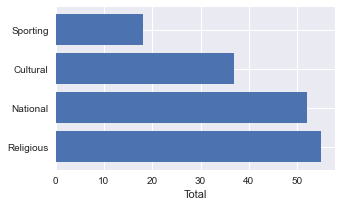

In [44]:
#Understanding the event type 1 and names within that

#Plotting number of events by event type
events_df = Calendar.groupby(['event_name_1','event_type_1']).size().reset_index().rename(columns={0:'count'})
events_count = list()

for event in events_df['event_type_1'].unique():
    r1 = events_df[events_df['event_type_1'] == event]
    print(r1['count'].sum(),'\t',event)
    events_count.append(r1['count'].sum())
    
fig, ax = plt.subplots(figsize=(5, 3))
ax.barh(events_df['event_type_1'].unique(),events_count)
plt.xlabel("Total")
plt.show()
    

In [45]:
#Understanding the event type 2 and names within that

Calendar.groupby(['event_name_2','event_type_2']).size().reset_index().rename(columns={0:'count'})


,event_name_2,event_type_2,count
0,Cinco De Mayo,Cultural,1
1,Easter,Cultural,1
2,Father's day,Cultural,2
3,OrthodoxEaster,Religious,1


In [46]:
#Checking for overlap of events - days with One Event , Two Events or Zero information

conditions_eventname = [ (Calendar['event_name_1'].isnull()),(Calendar['event_name_2'].isnull()),(Calendar['event_name_1'].notnull()& Calendar['event_name_2'].notnull())   ]
values_eventname = [Calendar['event_name_2'], Calendar['event_name_1'], Calendar['event_name_1'] + Calendar['event_name_2']]
Calendar['EventName'] = np.select(conditions_eventname, values_eventname)

conditions_eventtype = [ (Calendar['event_type_1'].isnull()),(Calendar['event_type_2'].isnull()),(Calendar['event_type_1'].notnull()& Calendar['event_type_2'].notnull())   ]
values_eventtype = [Calendar['event_type_2'], Calendar['event_type_1'], Calendar['event_type_1'] + Calendar['event_type_2']]
Calendar['EventType'] = np.select(conditions_eventtype, values_eventtype)

#Creating new columns to calendar to represnt event count
conditions_eventcount = [(Calendar['event_type_1'].notnull()& Calendar['event_type_2'].notnull()) ,(Calendar['event_type_1'].notnull() | Calendar['event_type_2'].notnull()) ,(Calendar['event_type_1'].isnull()& Calendar['event_type_2'].isnull())]
values_eventcount = ['Two','One','Zero']
Calendar['EventCount'] = np.select(conditions_eventcount, values_eventcount)


In [47]:
# Looking at days by Event count
CalendarNew = Calendar.drop(['wm_yr_wk','event_name_1','event_name_2','event_type_1','event_type_2','snap_CA','snap_WI'], axis=1)
print(CalendarNew.groupby(['EventCount']).size())
CalendarNew[CalendarNew['EventCount']=='Two']

EventCount
One      157
Two        5
Zero    1807
dtype: int64


,date,weekday,wday,month,year,d,snap_TX,EventName,EventType,EventCount
85,2011-04-24,Sunday,2,4,2011,d_86,0,OrthodoxEasterEaster,ReligiousCultural,Two
827,2013-05-05,Sunday,2,5,2013,d_828,1,OrthodoxEasterCinco De Mayo,ReligiousCultural,Two
1177,2014-04-20,Sunday,2,4,2014,d_1178,0,EasterOrthodoxEaster,CulturalReligious,Two
1233,2014-06-15,Sunday,2,6,2014,d_1234,1,NBAFinalsEndFather's day,SportingCultural,Two
1968,2016-06-19,Sunday,2,6,2016,d_1969,0,NBAFinalsEndFather's day,SportingCultural,Two


In [48]:
#Joining sales data to event count data
CalendarAnalysis_Sales = pd.merge(TX_CatStoreDept_temp,CalendarNew[['date','snap_TX','EventName','EventType','EventCount']],on='date', how='left')


In [49]:
CalendarAnalysis_Sales

,cat_id,store_id,dept_id,d,Sales,date,snap_TX,EventName,EventType,EventCount
0,FOODS,TX_1,FOODS_1,d_1,152,2011-01-29,0,NaN,NaN,Zero
1,FOODS,TX_1,FOODS_2,d_1,390,2011-01-29,0,NaN,NaN,Zero
2,FOODS,TX_1,FOODS_3,d_1,1239,2011-01-29,0,NaN,NaN,Zero
3,FOODS,TX_2,FOODS_1,d_1,210,2011-01-29,0,NaN,NaN,Zero
4,FOODS,TX_2,FOODS_2,d_1,534,2011-01-29,0,NaN,NaN,Zero
...,...,...,...,...,...,...,...,...,...,...
40168,HOUSEHOLD,TX_1,HOUSEHOLD_2,d_1913,228,2016-04-24,0,NaN,NaN,Zero
40169,HOUSEHOLD,TX_2,HOUSEHOLD_1,d_1913,782,2016-04-24,0,NaN,NaN,Zero
40170,HOUSEHOLD,TX_2,HOUSEHOLD_2,d_1913,244,2016-04-24,0,NaN,NaN,Zero
40171,HOUSEHOLD,TX_3,HOUSEHOLD_1,d_1913,864,2016-04-24,0,NaN,NaN,Zero


  EventCount       sum          mean    max          std
0        One   1451348   9675.653333  14149  2659.677730
1        Two     45663  11415.750000  12908  2042.823704
2       Zero  17401995   9893.118249  18733  1890.756292


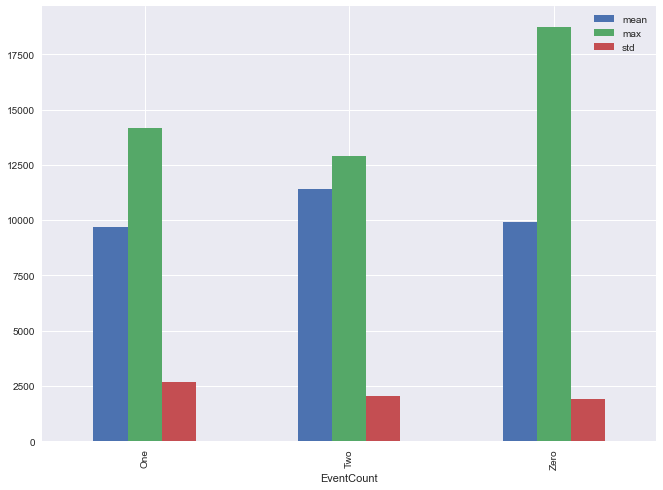

In [50]:
#Aggregating the sales data on event count level
CalendarAnalysis_EventCountSales = CalendarAnalysis_Sales.groupby(['date','EventCount'], as_index=False).agg({"Sales": "sum"})

"""
#abc = CalendarAnalysis_SnapSales.groupby(['date','snap_TX'])['Sales'].sum().unstack()
#abc.plot(kind='line',ylabel = "Sales",title="Food departmemt wise sales",figsize=(15,6))
#CalendarAnalysis_FoodSales['Sales'].sum()

#CalendarAnalysis_SnapSales['snap_TX'] = CalendarAnalysis_SnapSales['snap_TX'].replace([0],'No')
#CalendarAnalysis_SnapSales['snap_TX'] = CalendarAnalysis_SnapSales['snap_TX'].replace([1],'Yes')

print(CalendarAnalysis_SnapSalesYes.describe())
print(CalendarAnalysis_SnapSalesNo.describe())
"""

#Calculating the Sum, Mean, Max and StdDev metrics for each event count and plotting it as bar graph below
EventCountSales = CalendarAnalysis_EventCountSales.groupby('EventCount',as_index=False).agg(['sum','mean', 'max', std]).reset_index(drop = False)
EventCountSales.columns =['EventCount','sum','mean','max','std']
print(EventCountSales)
EventCountSales.plot(x="EventCount", y=['mean','max','std'], kind="bar",figsize=(11,8))
plt.show()

In [51]:
CalendarAnalysis_FoodSales = CalendarAnalysis_Sales[(CalendarAnalysis_Sales['cat_id']=='FOODS')]

#TX_FoodDept = TX_CatStoreDept[(TX_CatStoreDept['cat_id'] == 'FOODS')] 
#abc = CalendarAnalysis_FoodSales.groupby(['date', 'snap_TX']).sum()['Sales'].unstack()
#abc.plot(kind='line',ylabel = "Sales",title="Food departmemt wise sales",figsize=(15,6))

#Food sales data is splitted into SNAP / non SNAP days and aggregated
CalendarAnalysis_SnapSales = CalendarAnalysis_FoodSales.groupby(['date','snap_TX'], as_index=False).agg({"Sales": "sum"})
CalendarAnalysis_SnapSalesYes = CalendarAnalysis_SnapSales[(CalendarAnalysis_SnapSales['snap_TX']==1)]
CalendarAnalysis_SnapSalesNo = CalendarAnalysis_SnapSales[(CalendarAnalysis_SnapSales['snap_TX']==0)]

#abc = CalendarAnalysis_SnapSales.groupby(['date','snap_TX'])['Sales'].sum().unstack()
#abc.plot(kind='line',ylabel = "Sales",title="Food departmemt wise sales",figsize=(15,6))
#CalendarAnalysis_FoodSales['Sales'].sum()

#CalendarAnalysis_SnapSales['snap_TX'] = CalendarAnalysis_SnapSales['snap_TX'].replace([0],'No')
#CalendarAnalysis_SnapSales['snap_TX'] = CalendarAnalysis_SnapSales['snap_TX'].replace([1],'Yes')

#Understanding basic metrics like mean and count for SNAP vs NON SNAP days
print(CalendarAnalysis_SnapSalesYes.describe())
print(CalendarAnalysis_SnapSalesNo.describe())

       snap_TX         Sales
count    630.0    630.000000
mean       1.0   7447.206349
std        0.0   1208.150234
min        1.0   4612.000000
25%        1.0   6606.000000
50%        1.0   7200.500000
75%        1.0   8205.500000
max        1.0  14333.000000
       snap_TX         Sales
count   1283.0   1283.000000
mean       0.0   6441.684334
std        0.0   1272.188946
min        0.0      2.000000
25%        0.0   5610.500000
50%        0.0   6265.000000
75%        0.0   7225.500000
max        0.0  10564.000000


8264681

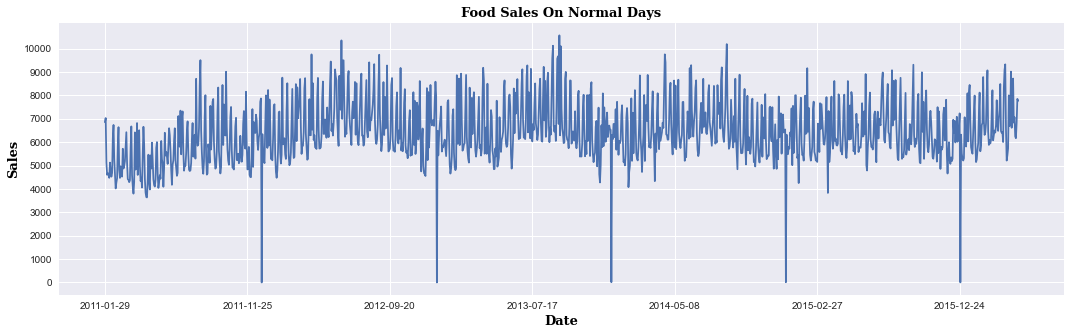

In [52]:
ytick_values = [y for y in range(0,11000,1000)]

#PLotting the sales trend for Non SNAP days - Normal Days
SnapSalesNo = CalendarAnalysis_SnapSalesNo.groupby(['date'])['Sales'].sum()
SnapSalesNo.plot(kind='line',figsize=(18,5),yticks=ytick_values)

#Setting axes labels and title names 
plt.title("Food Sales On Normal Days", fontdict=font)
plt.xlabel('Date',fontdict=font)
plt.ylabel('Sales',fontdict=font)

CalendarAnalysis_SnapSalesNo['Sales'].sum()

Text(0, 0.5, 'Sales')

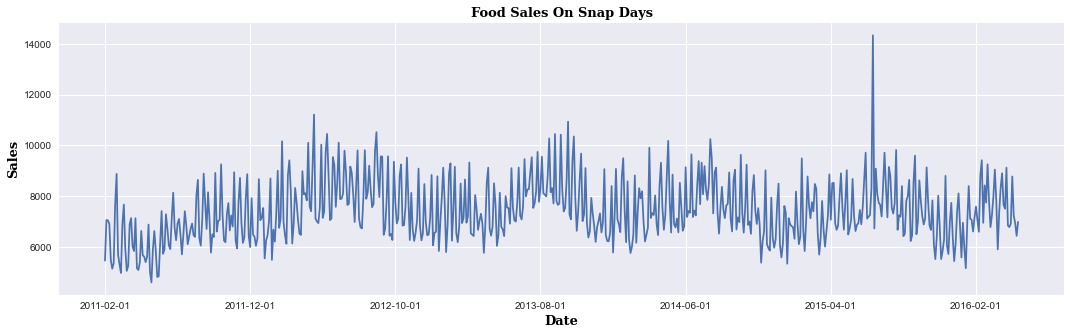

In [53]:
#PLotting the sales trend for SNAP days 
SnapSalesYes = CalendarAnalysis_SnapSalesYes.groupby(['date'])['Sales'].sum()
SnapSalesYes.plot(kind='line',figsize=(18,5))
CalendarAnalysis_SnapSalesYes['Sales'].sum()

#Setting axes labels and title names
plt.title("Food Sales On Snap Days", fontdict=font)
plt.xlabel('Date',fontdict=font)
plt.ylabel('Sales',fontdict=font)

Text(0, 0.5, 'Sales')

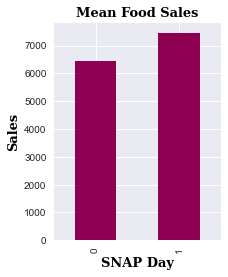

In [54]:
#Comparing the Mean food sales for SNAP vs Normal Days
Comp = CalendarAnalysis_SnapSales.groupby(['snap_TX'])['Sales'].mean()
Comp.plot(kind='bar',figsize=(3,4),colormap='PiYG')
CalendarAnalysis_FoodSales['Sales'].sum()

#Setting axes labels and title names
plt.title("Mean Food Sales", fontdict=font)
plt.xlabel('SNAP Day',fontdict=font)
plt.ylabel('Sales',fontdict=font)

#legend?

In [55]:
#Briefly looking at Sales by Event type and category
CalendarAnalysis_EventTypeSales = CalendarAnalysis_Sales.groupby(['EventType','cat_id'], as_index=False).agg({"Sales": "sum"})
CalendarAnalysis_EventTypeSales


,EventType,cat_id,Sales
0,Cultural,FOODS,243912
1,Cultural,HOBBIES,28770
2,Cultural,HOUSEHOLD,75805
3,CulturalReligious,FOODS,9407
4,CulturalReligious,HOBBIES,831
5,CulturalReligious,HOUSEHOLD,2315
6,National,FOODS,315188
7,National,HOBBIES,34672
8,National,HOUSEHOLD,99977
9,Religious,FOODS,340523


In [58]:
# Installing Calmap library for creating heat maps

In [59]:
!pip install calmap

(<Figure size 1512x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>], dtype=object))

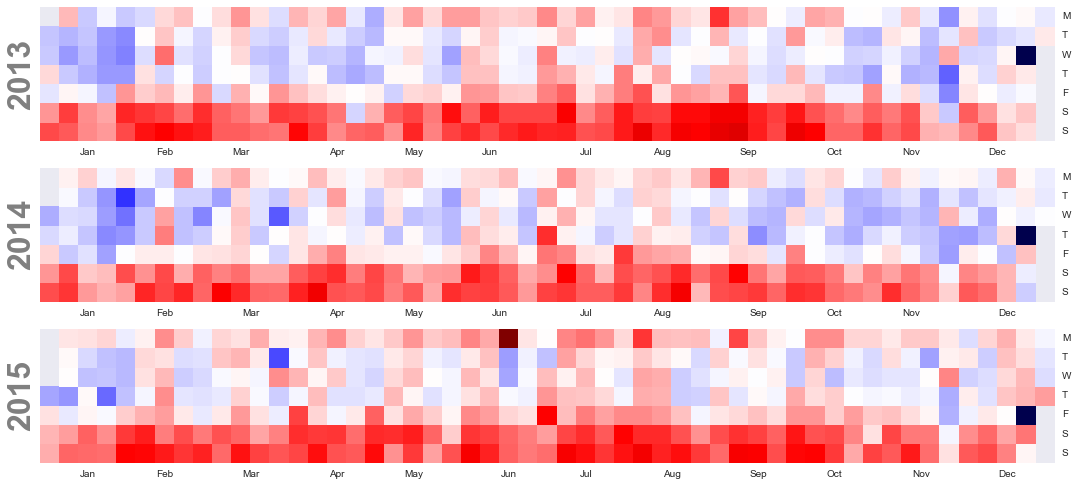

In [60]:
# Heat map for overall Texas store sales across 3 years
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

Overall_Sales.index = pd.to_datetime(Overall_Sales.index)

for state in Item_Sales_TX['state_id'].unique(): #Selecting TX
    products = [k for k in Overall_Sales.columns if state in k]    

    total_sales_year = Overall_Sales.loc[Overall_Sales.index.isin(pd.date_range('1-Jan-2013',
                                                                   periods=1095))][products].mean(axis=1)
#Calendar plot from Calmap library
#Reference : https://pythonhosted.org/calmap/
calmap.calendarplot(total_sales_year, monthticks=3, daylabels='MTWTFSS', cmap='seismic',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(21, 7)))

#blue means low volume and red mean high volume

(<Figure size 1512x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>], dtype=object))

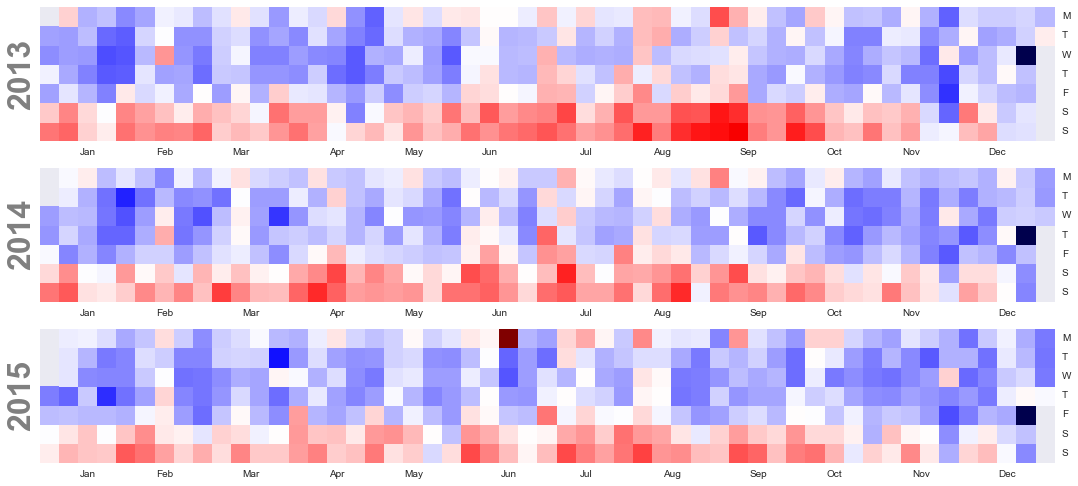

In [61]:
# Heat map for overall Texas store FOOD sales across 3 years
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

products = [k for k in Overall_Sales.columns if 'FOODS' in k]    

total_sales_food = Overall_Sales.loc[Overall_Sales.index.isin(pd.date_range('1-Jan-2013',
                                                                   periods=1095))][products].mean(axis=1)
#Calendar plot from Calmap library
#Reference : https://pythonhosted.org/calmap/
calmap.calendarplot(total_sales_food, monthticks=3, daylabels='MTWTFSS', cmap='seismic',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(21, 7)))

#blue means low volume and red mean high volume

(<Figure size 1512x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>], dtype=object))

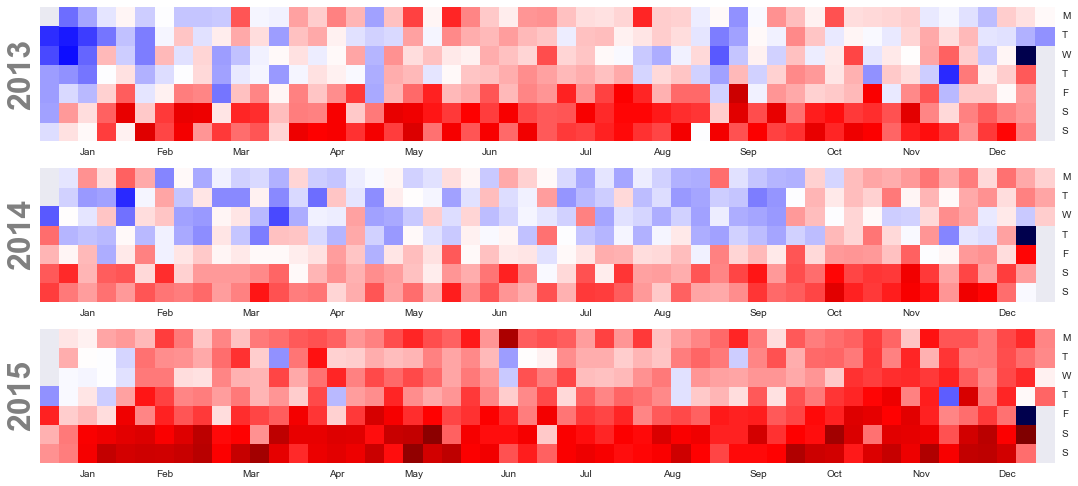

In [62]:
# Heat map for overall Texas store HOBBIES sales across 3 years
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

products = [k for k in Overall_Sales.columns if 'HOBBIES' in k]    

total_sales_hobbies = Overall_Sales.loc[Overall_Sales.index.isin(pd.date_range('1-Jan-2013',
                                                                   periods=1095))][products].mean(axis=1)
#Calendar plot from Calmap library
#Reference : https://pythonhosted.org/calmap/
calmap.calendarplot(total_sales_hobbies, monthticks=3, daylabels='MTWTFSS', cmap='seismic',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(21, 7)))

#blue means low volume and red mean high volume

(<Figure size 1512x504 with 3 Axes>,
 array([<AxesSubplot:ylabel='2013'>, <AxesSubplot:ylabel='2014'>,
        <AxesSubplot:ylabel='2015'>], dtype=object))

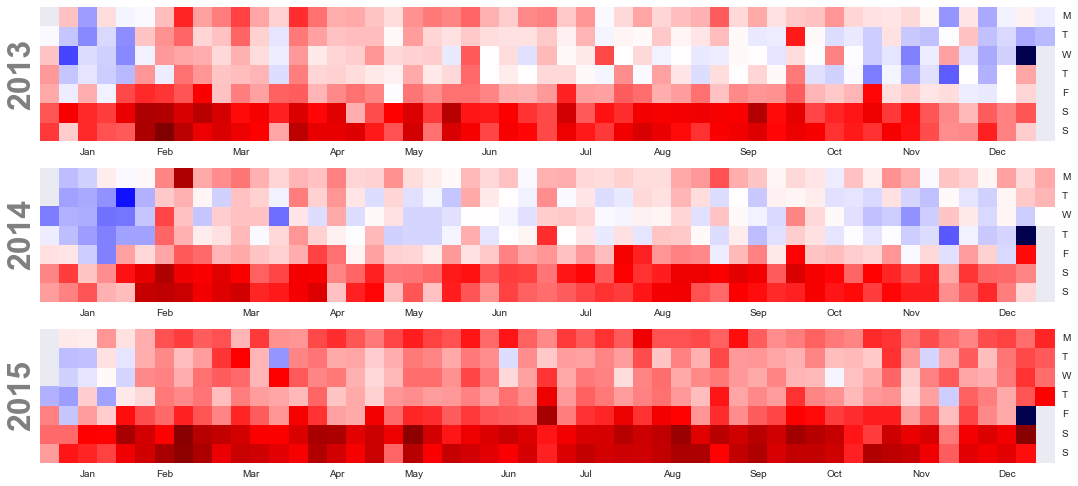

In [63]:
# Heat map for overall Texas store HOUSEHOLD sales across 3 years
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

products = [k for k in Overall_Sales.columns if 'HOUSEHOLD' in k]    

total_sales_HOUSEHOLD = Overall_Sales.loc[Overall_Sales.index.isin(pd.date_range('1-Jan-2013',
                                                                   periods=1095))][products].mean(axis=1)
#Calendar plot from Calmap library
#Reference : https://pythonhosted.org/calmap/
calmap.calendarplot(total_sales_HOUSEHOLD, monthticks=3, daylabels='MTWTFSS', cmap='seismic',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(21, 7)))
